## Lib

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import cv2
%matplotlib inline

## Vars

In [19]:
dataset_url = "../../storage/datas/csv/clean/cleaned_dataset.csv"
cleaned_dataset = pd.read_csv(dataset_url, low_memory=False)
img_url = "/home/guillaume/Téléchargements/mushroom-dataset/clean_dataset/"


## Cleaned Dataset with features - build

In [20]:
def extract_features(df:pd.DataFrame) -> pd.DataFrame:
    """
    Extracts features from images in the given DataFrame.

    Args:
        df (pandas.DataFrame): The DataFrame containing image information.

    Returns:
        pandas.DataFrame: A DataFrame with extracted features.

    """
    feature_list = []

    for index, row in df.iterrows():
        # Load img
        filepath = img_url + row['image_lien']
        img = cv2.imread(filepath)

        # Get img features
        high, width, canal = img.shape

        # Extract features
        features_extracted = {
        'high': high,
        'width': width,
        'red mean': np.mean(img[:,:,2]),
        'green mean': np.mean(img[:,:,1]),
        'blue mean': np.mean(img[:,:,0])}
        
        feature_list.append(features_extracted)

    # Make DataFrame
    feature_extracted_df = pd.DataFrame(feature_list)
    feature_extracted_df['color mean'] = (feature_extracted_df['red mean']\
                                   + feature_extracted_df['green mean']\
                                    + feature_extracted_df['blue mean']) / 3

    
    return feature_extracted_df

In [21]:
features_extracted_df = extract_features(cleaned_dataset)

In [25]:
features_extracted_df.head()

,width,high,red mean,green mean,blue mean,color mean
0,320,240,77.321185,72.687839,70.582227,73.530417
1,320,240,71.123307,64.609049,62.255977,65.996111
2,320,240,84.582305,70.401758,54.611263,69.865109
3,240,320,28.234687,27.118841,23.883490,26.412339
4,240,320,41.552617,35.021029,26.419349,34.330998


In [26]:
def RemoveBadDimensions(df: pd.DataFrame, high_min_value=200, width_min_value=200) -> pd.DataFrame:
    """
    Remove images from the DataFrame that have dimensions below the specified minimum values.

    Args:
        df (pd.DataFrame): The DataFrame containing the image data.
        high_min_value (int, optional): The minimum height value for an image to be considered valid. Defaults to 200.
        width_min_value (int, optional): The minimum width value for an image to be considered valid. Defaults to 200.

    Returns:
        pd.DataFrame: The filtered DataFrame with images that meet the minimum dimension requirements.
    """
    df = df[df['width'] > width_min_value]
    df = df[df['high'] > high_min_value]
    
    return df
def RemoveBadDimensions(df:pd.DataFrame, high_min_value=200, width_min_value=200) -> pd.DataFrame:
    """

    """
    df = df[df['width'] > width_min_value]
    df = df[df['high'] > high_min_value]
    
    return df

In [27]:
features_extracted_without_bad_dimensions = RemoveBadDimensions(features_extracted_df)

In [28]:
# Ajouter jointure clean_dataset et features_extracted_without_bad_dimensions
cleaned_dataset = cleaned_dataset.reset_index(drop=True)
features_extracted_without_bad_dimensions = features_extracted_without_bad_dimensions.reset_index(drop=True)
cleaned_dataset = pd.concat([cleaned_dataset, features_extracted_without_bad_dimensions], axis=1)

In [33]:
cleaned_dataset.dropna(inplace=True)

In [36]:
cleaned_dataset.to_csv("../../storage/datas/csv/clean/cleaned_dataset_with_features.csv", index = False)

## Feature analysis

In [38]:
dataset_url = "../../storage/datas/csv/clean/cleaned_dataset_with_features.csv"
cleaned_dataset_wwith_features = pd.read_csv(dataset_url, low_memory=False)


In [39]:
cleaned_dataset_wwith_features.head()

,image_lien,label,family,phylum,species,canonicalName,class,genus,order,width,high,red mean,green mean,blue mean,color mean
0,1.jpg,Xylaria polymorpha,Xylariaceae,Ascomycota,Xylaria polymorpha,Xylaria polymorpha,Sordariomycetes,Xylaria,Xylariales,320.0,240.0,77.321185,72.687839,70.582227,73.530417
1,2.jpg,Xylaria magnoliae,Xylariaceae,Ascomycota,Xylaria magnoliae,Xylaria magnoliae,Sordariomycetes,Xylaria,Xylariales,320.0,240.0,71.123307,64.609049,62.255977,65.996111
2,3.jpg,Xylaria hypoxylon,Xylariaceae,Ascomycota,Xylaria hypoxylon,Xylaria hypoxylon,Sordariomycetes,Xylaria,Xylariales,320.0,240.0,84.582305,70.401758,54.611263,69.865109
3,4.jpg,Xylaria hypoxylon,Xylariaceae,Ascomycota,Xylaria hypoxylon,Xylaria hypoxylon,Sordariomycetes,Xylaria,Xylariales,240.0,320.0,28.234687,27.118841,23.883490,26.412339
4,6.jpg,Xeromphalina campanella,Mycenaceae,Basidiomycota,Xeromphalina campanella,Xeromphalina campanella,Agaricomycetes,Xeromphalina,Agaricales,240.0,320.0,41.552617,35.021029,26.419349,34.330998


<Figure size 1600x1200 with 0 Axes>

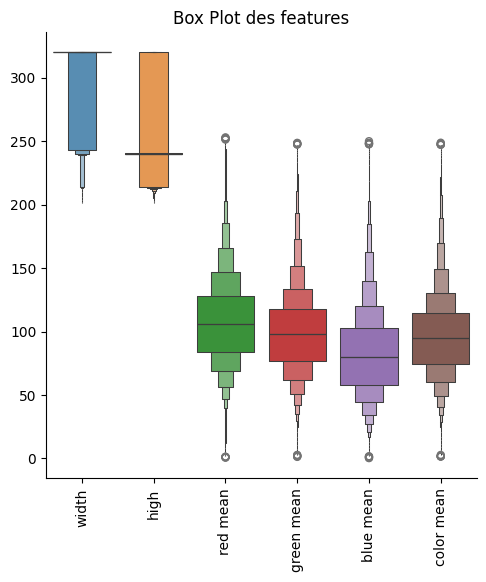

In [41]:
# Features Box Plot
plt.figure(figsize=(16,12))
sns.catplot(df, kind='boxen')
plt.grid(False)
plt.title('Features Box plot')
plt.xticks(rotation = 90);

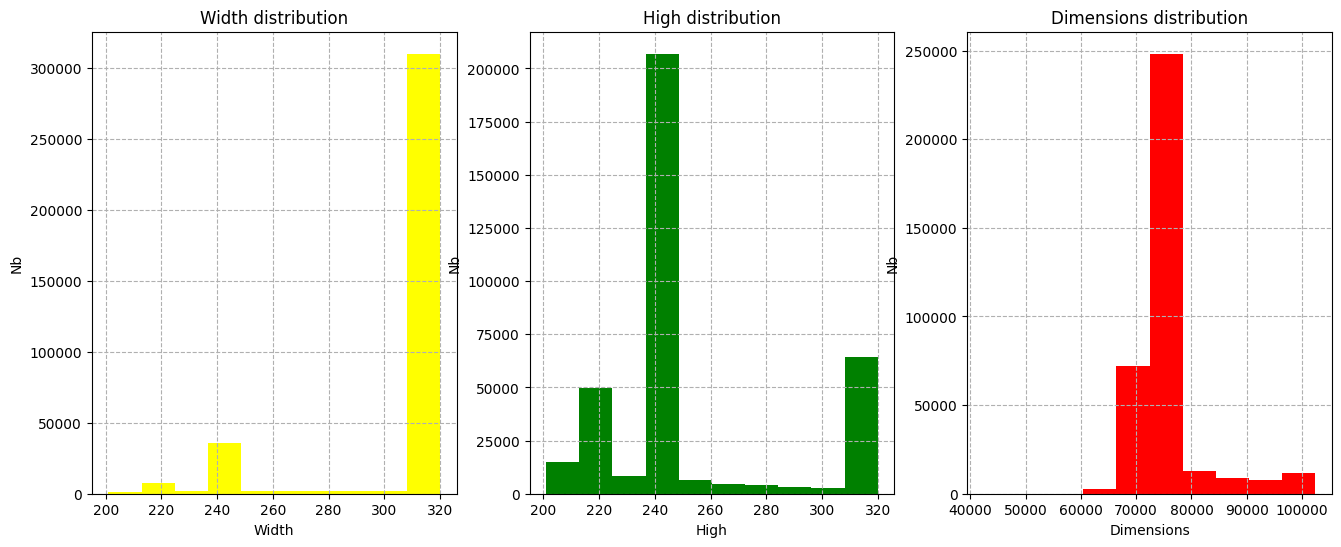

In [44]:
# Img dimensions comparison
cleaned_dataset_with_features['dimensions'] = (cleaned_dataset_with_features['high'] * cleaned_dataset_with_features['width'])
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(16, 6))


# Widths graph
ax1.hist(x = 'width', data = cleaned_dataset_with_features, color='yellow')
ax1.set_title('Width distribution')
ax1.set_xlabel('Width')
ax1.set_ylabel('Nb')
ax1.grid(True, linestyle = '--')

# Highs graph
ax2.hist(x = 'high', data = cleaned_dataset_with_features, color='green')
ax2.set_title('High distribution')
ax2.set_xlabel('High')
ax2.set_ylabel('Nb')
ax2.grid(True, linestyle = '--')

# Dimensions graph
ax3.hist(x = 'dimensions', data = cleaned_dataset_with_features, color='red')
ax3.set_title('Dimensions distribution')
ax3.set_xlabel('Dimensions')
ax3.set_ylabel('Nb')
ax3.grid(True, linestyle = '--')


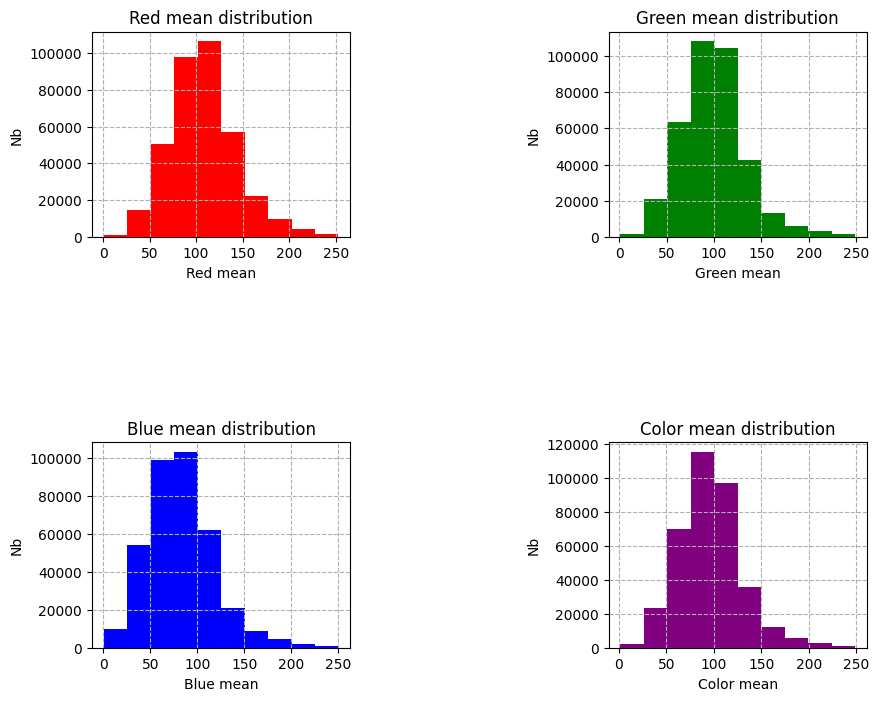

In [46]:
# RGB mean comparison
fig, ((ax4,ax5),(ax6,ax7)) = plt.subplots(2,2, figsize=(10,8))
plt.subplots_adjust(wspace=1, hspace=1)

# Red mean graph
ax4.hist(x = 'red mean', data = cleaned_dataset_with_features, color='red')
ax4.set_title('Red mean distribution')
ax4.set_xlabel('Red mean')
ax4.set_ylabel('Nb')
ax4.grid(True, linestyle = '--')

# Green mean graph
ax5.hist(x = 'green mean', data = cleaned_dataset_with_features, color='green')
ax5.set_title('Green mean distribution')
ax5.set_xlabel('Green mean')
ax5.set_ylabel('Nb')
ax5.grid(True, linestyle = '--')

# Blue mean graph
ax6.hist(x = 'blue mean', data = cleaned_dataset_with_features, color='blue')
ax6.set_title('Blue mean distribution')
ax6.set_xlabel('Blue mean')
ax6.set_ylabel('Nb')
ax6.grid(True, linestyle = '--')

# Color mean graph
ax7.hist(x = 'color mean', data = cleaned_dataset_with_features, color='purple')
ax7.set_title('Color mean distribution')
ax7.set_xlabel('Color mean')
ax7.set_ylabel('Nb')
ax7.grid(True, linestyle = '--')
